# S03 T05 Dataframes


## Exercici 1
Dataframe de demora en aerolíneas

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# doy formato a los floats para que no muestren decimales, analizando los datos se ve que se trata de enteros
pd.options.display.float_format = '{:.0f}'.format

# Cargar los datos de demora de aerolíneas en un dataframe
delays = pd.read_csv('DelayedFlights.csv', sep=',')
print(delays.info())

# Look at the first rows
delays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211,2225,WN,...,4,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002,1000,WN,...,5,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804,750,WN,...,3,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959,1925,WN,...,3,10,0,N,0,2,0,0,0,32
4,5,2008,1,3,4,1940,1915,2121,2110,WN,...,4,10,0,N,0,NaN,NaN,NaN,NaN,NaN


In [104]:
# la fila 3 parece tener todos los campos completos
delays.iloc[3]

Unnamed: 0                4
Year                   2008
Month                     1
DayofMonth                3
DayOfWeek                 4
DepTime                1829
CRSDepTime             1755
ArrTime                1959
CRSArrTime             1925
UniqueCarrier            WN
FlightNum              3920
TailNum              N464WN
ActualElapsedTime        90
CRSElapsedTime           90
AirTime                  77
ArrDelay                 34
DepDelay                 34
Origin                  IND
Dest                    BWI
Distance                515
TaxiIn                    3
TaxiOut                  10
Cancelled                 0
CancellationCode          N
Diverted                  0
CarrierDelay              2
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay        32
Name: 3, dtype: object

### This dataset is composed by the following variables:
1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. vCRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
16. DepDelay departure delay, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance in miles
20. TaxiIn taxi in time, in minutes
21. TaxiOut taxi out time in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
28. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [105]:
delays['Diverted'].value_counts()
# la gran mayoría de los vuelos no fue desviado

0    1929004
1       7754
Name: Diverted, dtype: int64

In [106]:
delays['ArrDelay'].describe()
# la mitad de los vuelos llegaron con más de 24 minutos de demora

count   1928371
mean         42
std          57
min        -109
25%           9
50%          24
75%          56
max        2461
Name: ArrDelay, dtype: float64

In [107]:
delays['WeatherDelay'].describe()
# hay pocos vuelos con mucha demora por el clima 

count   1247488
mean          4
std          21
min           0
25%           0
50%           0
75%           0
max        1352
Name: WeatherDelay, dtype: float64

In [108]:
# hay algún mes con más problemas que otro?
delays.groupby('Month').agg({'CarrierDelay':[np.median,np.mean,max],'WeatherDelay':[np.median,np.mean,max],'NASDelay':[np.median,np.mean,max],'SecurityDelay':[np.median,np.mean,max],'LateAircraftDelay':[np.median,np.mean,max]})

CarrierDelay           WeatherDelay           NASDelay            \
            median mean  max       median mean  max   median mean  max   
Month                                                                    
1                3   19 1158            0    4 1049        1   14 1357   
2                1   19 1455            0    4 1148        1   15 1195   
3                3   19 1490            0    4  872        1   14 1289   
4                4   20 2436            0    3 1027        2   14 1207   
5                2   18 1951            0    3  797        2   14  706   
6                0   18 1707            0    4  940        3   18 1030   
7                1   20 1510            0    5  908        1   18 1337   
8                3   21 1359            0    4  845        0   15 1137   
9                4   22 1552            0    3  996        1   14  604   
10               5   20 1369            0    2  834        0   12  529   
11               1   17 1230            0    2  878        3   17  755   
12               3   18 1307            0    5 1352        3   15  903   

      SecurityDelay          LateAircraftDelay            
             median mean max            median mean  max  
Month                                                     
1                 0    0 136                 9   26  897  
2                 0    0 149                11   27 1143  
3                 0    0 142                10   26 1254  
4                 0    0 392                 8   23  553  
5                 0    0 175                 9   24  850  
6                 0    0 284                 9   26  879  
7                 0    0 211                 4   26 1316  
8                 0    0 216                 4   25 1012  
9                 0    0 357                 0   19 1303  
10                0    0 199                 4   20  532  
11                0    0  87                 7   24 1236  
12                0    0 254                14   30 1143

In [109]:
# tendrá que ver la fecha?
delays.groupby('DayofMonth').agg({'ArrDelay':[np.median,np.mean,max]})

ArrDelay          
             median mean  max
DayofMonth                   
1                25   42 1583
2                24   41 1308
3                23   39 2461
4                29   49 1292
5                24   39 1525
6                25   43 1951
7                26   41 1196
8                27   46 1370
9                23   40 1091
10               26   46 2453
11               24   42 1382
12               23   39 1166
13               24   43 1265
14               24   40 1190
15               24   41 1357
16               23   41 1510
17               23   38 1395
18               23   40 1291
19               24   43 1655
20               24   41 1707
21               26   43 1490
22               27   45 1350
23               24   44 1177
24               22   39 1395
25               23   40 1143
26               26   45 1417
27               26   48 1542
28               22   39 1359
29               23   38 1337
30               24   42 1325
31               31   53 1134

In [136]:
# voy a eliminar columnas que parece que no aportan
delays_red = delays.drop(df.columns[[0, 1]], axis='columns')
delays_red = delays_red.drop(['DayOfWeek','TaxiIn','TaxiOut','CRSElapsedTime','ActualElapsedTime'], axis = 1)
delays_red.shape

(1936758, 23)

### Correlación entre variables

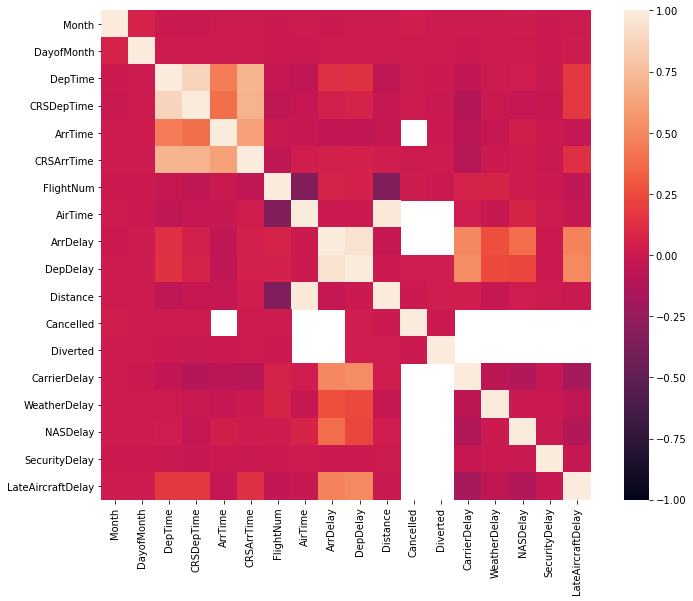

In [137]:
# busco relaciones entre las variables que me quedan
import seaborn as sns
correlac = delays_red.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlac, vmax=1, vmin=-1, square=True);
plt.show()


In [138]:
correlac = delays_red.corr()
pd.options.display.float_format = '{:.1f}'.format
print(correlac)

                   Month  DayofMonth  DepTime  CRSDepTime  ArrTime  \
Month                1.0         0.1     -0.0        -0.0      0.0   
DayofMonth           0.1         1.0      0.0         0.0      0.0   
DepTime             -0.0         0.0      1.0         0.9      0.5   
CRSDepTime          -0.0         0.0      0.9         1.0      0.4   
ArrTime              0.0         0.0      0.5         0.4      1.0   
CRSArrTime           0.0         0.0      0.7         0.7      0.6   
FlightNum           -0.0        -0.0     -0.0        -0.1     -0.0   
AirTime              0.0        -0.0     -0.1        -0.0     -0.0   
ArrDelay            -0.0         0.0      0.1         0.0     -0.1   
DepDelay             0.0         0.0      0.1         0.1     -0.1   
Distance             0.0         0.0     -0.1        -0.0     -0.0   
Cancelled            0.0         0.0      0.0         0.0      NaN   
Diverted             0.0         0.0     -0.0        -0.0     -0.0   
CarrierDelay        

In [139]:
# Las fechas no se correlacionan con nada, las elimino, lo mismo el campo Diverted. Saco TailNum,Origin y Dest
del_min = delays_red.drop(['Month','DayofMonth','Diverted','Origin','Dest','TailNum'], axis = 1)

#  ArrDelay resume CRSArrTime y ArrTime así que las elimino
# DepTime y CRSDepTime tampoco me importan porque tengo DepDelay
del_min = del_min.drop(['CRSArrTime','ArrTime','DepTime','CRSDepTime'], axis = 1)

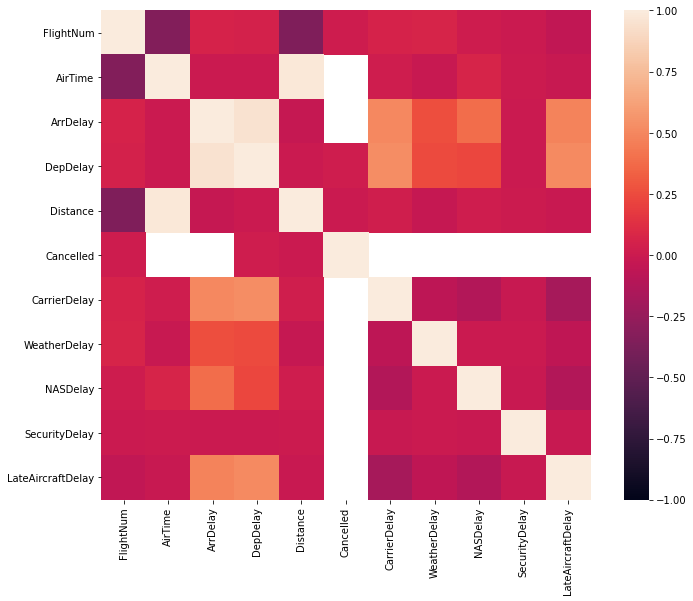

In [140]:
# vuelvo a dibujar las correlaciones
correlac = del_min.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlac, vmax=1, vmin=-1, square=True);
plt.show()

## Exercici 2

In [141]:
# Resumo estadísticamente las columnas que más me interesan:
del_min['ArrDelay'].describe()

count   1928371.0
mean         42.2
std          56.8
min        -109.0
25%           9.0
50%          24.0
75%          56.0
max        2461.0
Name: ArrDelay, dtype: float64

* veo que el 50% de los vuelos tienen una demora de más de 24 minutos
* algunos (pocos) vuelos llegan hasta 109 minutos antes de su hora de llegada
* el promedio de demora en el arribo es de 42 minutos

In [142]:
# salen tarde los vuelos?
del_min['DepDelay'].describe()

count   1936758.0
mean         43.2
std          53.4
min           6.0
25%          12.0
50%          24.0
75%          53.0
max        2467.0
Name: DepDelay, dtype: float64

In [143]:
# 1.936.758 vuelos salieron con demora (al menos 6 minutos), que son el total de vuelos
delays.shape

(1936758, 30)

In [144]:
# Encontrar las columnas que tienen valores faltantes
valores_nulos = delays.shape[0] - del_min.count()
print(valores_nulos)

UniqueCarrier             0
FlightNum                 0
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
Cancelled                 0
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [150]:
# los delays parciales no aportan mucho porque están incluídos en el ArrDelay y además les faltan muchos datos
del_min = del_min.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis = 1)

In [151]:
# agregar una columna con la velocidad mediana del vuelo
# vel_media en millas / hora
vel_media = del_min['Distance'] / (del_min['AirTime'] / 60 )
print(vel_media)

0         419.0
1         430.1
2         406.6
3         401.3
4         474.5
           ... 
1936753   453.0
1936754   370.0
1936755   338.9
1936756   359.3
1936757   504.2
Length: 1936758, dtype: float64


In [152]:
# agrego la columna al dataframe
del_min['VelMedia'] = vel_media
del_min.head(15)

,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Distance,Cancelled,CancellationCode,VelMedia
0,WN,335,116.0,-14.0,8.0,810,0,N,419.0
1,WN,3231,113.0,2.0,19.0,810,0,N,430.1
2,WN,448,76.0,14.0,8.0,515,0,N,406.6
3,WN,3920,77.0,34.0,34.0,515,0,N,401.3
4,WN,378,87.0,11.0,25.0,688,0,N,474.5
5,WN,509,230.0,57.0,67.0,1591,0,N,415.0
6,WN,100,106.0,1.0,6.0,828,0,N,468.7
7,WN,1333,107.0,80.0,94.0,828,0,N,464.3
8,WN,2272,37.0,11.0,9.0,162,0,N,262.7
9,WN,675,213.0,15.0,27.0,1489,0,N,419.4


In [156]:
# agrego un campo que indique si llegó tarde o no
tard = del_min['ArrDelay'] > 0
print(tard)
del_min['Tard'] = tard
print(del_min.head(10))

0          False
1           True
2           True
3           True
4           True
           ...  
1936753     True
1936754     True
1936755     True
1936756     True
1936757    False
Name: ArrDelay, Length: 1936758, dtype: bool
  UniqueCarrier  FlightNum  AirTime  ArrDelay  DepDelay  Distance  Cancelled  \
0            WN        335    116.0     -14.0       8.0       810          0   
1            WN       3231    113.0       2.0      19.0       810          0   
2            WN        448     76.0      14.0       8.0       515          0   
3            WN       3920     77.0      34.0      34.0       515          0   
4            WN        378     87.0      11.0      25.0       688          0   
5            WN        509    230.0      57.0      67.0      1591          0   
6            WN        100    106.0       1.0       6.0       828          0   
7            WN       1333    107.0      80.0      94.0       828          0   
8            WN       2272     37.0      11.0   

In [199]:
# averiguar las aerolíneas con más demoras
acum_tard = del_min.groupby('UniqueCarrier').agg({'Tard':[sum]})
print(acum_tard.sort_values(('Tard', 'sum'), ascending = False).head())

                 Tard
                  sum
UniqueCarrier        
WN             324717
AA             172197
MQ             130647
UA             123989
OO             121942


In [221]:
# averiguar los vuelos más largos en tiempo
max_tpo = del_min.sort_values('AirTime', ascending = False)
print(max_tpo[['UniqueCarrier','FlightNum','AirTime']].head(10))

        UniqueCarrier  FlightNum  AirTime
1488690            HA         21   1091.0
1367047            HA         28    733.0
362529             CO         15    664.0
556381             CO         15    655.0
556385             CO         15    654.0
556379             CO         15    654.0
556377             CO         15    652.0
556386             CO         15    651.0
362852             CO         15    649.0
363750             CO         15    648.0


In [242]:
# averiguar los vuelos más largos en distancia
max_dist = del_min.groupby(['UniqueCarrier','FlightNum'], axis = 0).agg({'Distance': max})
# dado un Carrier y un Nro de vuelo la distancia debería ser la misma (el cálculo de max no tiene sentido)
print(max_dist.sort_values('Distance', ascending = False).head(15))

                         Distance
UniqueCarrier FlightNum          
CO            14             4962
              15             4962
DL            851            4502
              1560           4502
              1282           4502
              1273           4502
              850            4502
              1561           4502
UA            1410           4243
AA            73             4243
              72             4243
UA            2              4243
              1              4243
              1003           4213
              3              4213


## Exercici 3
Convertir el DataFrame a Excel

In [263]:
# casi se dulplica el tamaño de filas posibles, pero lo tanto lo dividiré en dos hojas

mitad = int(del_min.shape[0] / 2)


df1 = del_min.iloc[:mitad]
df2 = del_min.iloc[mitad+1:]

with pd.ExcelWriter('delays.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')
